Capitulo 3: Tutorial de clasificación-Conjunto de datos del Titanic
========

# Importacion de las bibliotecas a utilizar 

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv
import pickle
from itertools import zip_longest
from tabulate import tabulate
import pdfkit
from itertools import zip_longest
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, cross_val_score  
from sklearn.experimental import enable_iterative_imputer
from sklearn import impute
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier
from sklearn import metrics
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
import sklearn.tree as tree
from sklearn.metrics import accuracy_score
import sklearn.neighbors as neighbors
import sklearn.naive_bayes as nb
import sklearn.svm as svm
import sklearn.ensemble as ensemble
import xgboost
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost


# Importacion de los datos

*La importacion de los datos parten del archivo *`"CSV"`*.* *`Un archivo CSV (Comma-Separated Values)`*  
*Un* *`archivo CSV (Comma-Separated Values)`* *es un formato de archivo que se utiliza para almacenar datos tabulares, como una hoja de cálculo o una base de datos. En un archivo CSV, los datos se organizan en filas y columnas, y cada celda de la tabla está separada por un delimitador, comúnmente una coma (,).*
*Cada fila del archivo CSV representa una entrada de datos, y las columnas dentro de esa fila contienen los valores asociados con diferentes atributos o características. La primera fila a menudo se utiliza para los encabezados, que describen el contenido de cada columna.*

*Consideremos el siguente ejemplo:*

*Nombre,Edad,Ciudad*  
*Juan,25,Medellín*  
*María,30,Bogotá*  
*Carlos,22,Cali*  



| Nombre | Edad | Ciudad    |
|--------|------|-----------|
| Juan   | 25   | Medellín  |
| María  | 30   | Bogotá    |
| Carlos | 22   | Cali      |


In [42]:
#Importar la base de datos 
df = pd.read_csv('titanic3.csv')
#Efectuo la copia del dataframe Importado
orig_df=df.copy()
#print(df)

# Importacion de datos CSV

In [43]:
import pandas as pd

def importar_csv_a_dataframe(path):
    try:
        dataframe = pd.read_csv(path)
        return dataframe
    except FileNotFoundError:
        print(f"El archivo no fue encontrado en la ruta: {path}")
        return None
    except Exception as e:
        print(f"Error al leer el archivo CSV: {e}")
        return None

# Ejemplo de uso
ruta_archivo = 'C:/Users/felip/OneDrive/Documentos/Python/Codigos/Ciencia_Datos/Datos_titanic_CSV/titanic3.csv'
datos_dataframe = importar_csv_a_dataframe(ruta_archivo)

# Naturaleza de los datos

In [44]:
#Analisar los tipos de datos que tengo en el data_frame
tipos_de_datos = df.dtypes
print(tipos_de_datos)

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object


*Una vez que tengamos los datos, debemos asegurarnos de que estén en un formato que podemos utilizar para crear un modelo. La mayoría de los modelos de "Machine Learning" requiere que nuestras características sean numéricas (entero o flotante). Además,muchos modelos fallan si se les pasan valores faltantes (NaN enpandas o numpy). Algunos modelos funcionan mejor si los datos son estandarizado (dado un valor medio de 0 y una desviación estándarde 1). Nos ocuparemos de estos problemas utilizando pandas o scikitleearn.*
*Además, el conjunto de datos del Titanic tiene características con fugas.Las características con "fugas" son variables que contienen información sobre el futuro o objetivo. No hay nada malo en tener datos sobre el objetivo, y a menudo tenemos esos datos durante el tiempo de creación del modelo.Sin embargo, si esas variables no están disponibles cuando realizamos una predicción en una nueva muestra, deberíamos eliminarlos del modelo ya que están filtrando datos del futuro.Limpiar los datos puede llevar un poco de tiempo. Ayuda a tener accesoa un experto en la materia (PYME) que pueda proporcionar orientación sobre lidiar con valores atípicos o datos faltantes.*

| Columna    | Descripción                  | Tipo    |
|------------|-----------------------------|---------|
| pclass     | Clase del pasajero           | int64   |
| survived   | Sobrevivió (0 = No, 1 = Sí)  | int64   |
| name       | Nombre del pasajero          | object  |
| sex        | Género                       | object  |
| age        | Edad                         | float64 |
| sibsp      | Número de hermanos/cónyuges a bordo | int64   |
| parch      | Número de padres/hijos a bordo      | int64   |
| ticket     | Número de boleto             | object  |
| fare       | Tarifa del pasaje            | float64 |
| cabin      | Número de cabina             | object  |
| embarked   | Puerto de embarque           | object  |
| boat       | Número del bote de rescate   | object  |
| body       | Número de identificación del cuerpo (si falleció) | float64 |
| home.dest  | Destino del pasajero         | object  |


- **pclass**: Representa la clase del pasajero (1, 2, 3).
- **survived**: Indica si el pasajero sobrevivió (1) o no (0).
- **name**: Nombre del pasajero.
- **sex**: Género del pasajero (object indica que es una cadena de texto).
- **age**: Edad del pasajero.
- **sibsp**: Número de hermanos o cónyuges a bordo.
- **parch**: Número de padres o hijos a bordo.
- **ticket**: Número del boleto.
- **fare**: Tarifa del pasaje.
- **cabin**: Número de cabina.
- **embarked**: Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).
- **boat**: Número del bote de rescate.
- **body**: Número de identificación del cuerpo (si falleció).
- **home.dest**: Destino del pasajero.

- **int64**: Este tipo de dato representa enteros de 64 bits, es decir, **números enteros**. Las columnas como *pclass*, *survived*, *sibsp*, y *parch* parecen contener información numérica entera.

- **object**: Este tipo de dato se utiliza para representar **cadenas de texto** u otros objetos más complejos. Las columnas como *name*, *sex*, *ticket*, *cabin*, *embarked*, *boat*, y *home.dest* son de tipo *object* porque contienen información de texto.

- **float64**: Este tipo de dato se utiliza para representar números de punto flotante, es decir, números con decimales. Las columnas como *age*, *fare*, y *body* son de tipo *float64*.


# Analisis exploratorio de los datos con Sweetviz

*Utiliza la biblioteca *`sweetviz`* *para generar un informe de análisis exploratorio de datos (EDA) y luego usa *`wkhtmltopdf`* *a través de *`pdfkit`* *para convertir ese informe HTML en un archivo PDF.* *Este proceso puede ser útil para generar informes visuales de análisis de datos en un formato más portable como PDF.*

*Enlace de la biblioteca: "https://pypi.org/project/sweetviz/"*

In [45]:
# Análisis Exploratorio de Datos (EDA) con Sweetviz:

#report = sv.analyze(df)
#report.show_html('Pasajeros_titanic_reporte.html')

# Generación de un Archivo PDF a partir del Informe HTML:

# Ruta al archivo HTML del informe
#html_report_file = 'Pasajeros_titanic_reporte.html'

# Ruta de salida para el archivo PDF
#pdf_output_file = 'Pasajeros_titanic_reporte.pdf'

# Especifica la ruta al ejecutable de wkhtmltopdf manualmente
#config = pdfkit.configuration(wkhtmltopdf='C:/Program Files/wkhtmltopdf/bin/wkhtmltopdf.exe')
#pdfkit.from_file(html_report_file, pdf_output_file, configuration=config)



# Analisis alternativas exploratorias ; usando Pandas y Numpy 

<span style="font-size:30px; font-weight:bold;">Analisis exploratoria: Estadistica clasica </span>

In [46]:
#Hacer el analisis estadistico para todas las columnas con valores numericos
#variable=nombre_dataframe.describe().iloc(:,tamanho de las columnas)
Analisis = df.describe().iloc[:, :14]
#print(Analisis)
# Imprimir la tabla en formato Markdown
print(Analisis.to_markdown(stralign="center"))
#Analisis_quinta_columna = df.iloc[:, 4].describe()
#print(Analisis_quinta_columna)

|       |      pclass |    survived |       age |       sibsp |       parch |      fare |     body |
|:-----:|------------:|------------:|----------:|------------:|------------:|----------:|---------:|
| count | 1309        | 1309        | 1046      | 1309        | 1309        | 1308      | 121      |
| mean  |    2.29488  |    0.381971 |   29.8811 |    0.498854 |    0.385027 |   33.2955 | 160.81   |
|  std  |    0.837836 |    0.486055 |   14.4135 |    1.04166  |    0.86556  |   51.7587 |  97.6969 |
|  min  |    1        |    0        |    0.17   |    0        |    0        |    0      |   1      |
|  25%  |    2        |    0        |   21      |    0        |    0        |    7.8958 |  72      |
|  50%  |    3        |    0        |   28      |    0        |    0        |   14.4542 | 155      |
|  75%  |    3        |    1        |   39      |    1        |    0        |   31.275  | 256      |
|  max  |    3        |    1        |   80      |    8        |    9        |  512.329  | 3

<span style="font-size:30px; font-weight:bold;">Analisis exploratoria: Datos Ausentes </span>

*La presencia de datos faltantes, es la situación a la que permanentemente se enfrentan investigadores y tomadores de decisiones. Disponer de un archivo de datos completos es ideal, pero aplicar métodos de imputación inapropiados para lograrlo, puede generar más problemas de los que resuelve. Durante las últimas décadas se han desarrollado procedimientos que tienen mejores propiedades estadísticas que las opciones tradicionales como la eliminación de datos (listwise), el pareo de observaciones (pairwise), el método de medias y el hot-deck. Los algoritmos de imputación múltiple (IM) se pueden aplicar utilizando paquetes comerciales y de acceso gratuito, pero imputar información no debe entenderse como un fin en sí mismo.*

<span style="font-size:18px; font-weight:bold;">Analisis exploratoria: Reportar los  Datos Ausentes en cifras enteras </span>

In [47]:
#Identifica valores ausentes de cada variable contenida en la columna como variables enteras 
valores_ausentes=df.isnull().sum()
#print(valores_asutentes)
# Crea un DataFrame con los resultados
df_valores_ausentes = pd.DataFrame(valores_ausentes, columns=["Valores Ausentes (Entero)"])
# Imprimir la tabla en formato Markdown
print(tabulate(df_valores_ausentes, tablefmt="pipe", headers="keys", stralign="center", numalign="center"))

|           |  Valores Ausentes (Entero)  |
|:---------:|:---------------------------:|
|  pclass   |              0              |
| survived  |              0              |
|   name    |              0              |
|    sex    |              0              |
|    age    |             263             |
|   sibsp   |              0              |
|   parch   |              0              |
|  ticket   |              0              |
|   fare    |              1              |
|   cabin   |            1014             |
| embarked  |              2              |
|   boat    |             823             |
|   body    |            1188             |
| home.dest |             564             |


<span style="font-size:18px; font-weight:bold;">Analisis exploratoria: Reportar Datos Ausentes en porcentaje</span>

In [48]:
# Calcula el porcentaje de valores ausentes para cada variable en tu DataFrame
valores_ausentes_porcentaje = df.isnull().mean() * 100
#print(valores_asutentes)
# Convertir la serie a un DataFrame para que tabulate pueda manejarlo
df_valores_ausentes_porcentaje = valores_ausentes_porcentaje.to_frame().reset_index()
# Nombrar las columnas del nuevo DataFrame
# Nombrar las columnas del nuevo DataFrame
df_valores_ausentes_porcentaje.columns = ["Variable", "Porcentaje de Valores Ausentes [%]"]
# Imprimir la tabla en formato Markdown sin mostrar los índices de las filas
print(tabulate(df_valores_ausentes_porcentaje, tablefmt="pipe", headers="keys", stralign="center", numalign="center", showindex=False))



|  Variable  |  Porcentaje de Valores Ausentes [%]  |
|:----------:|:------------------------------------:|
|   pclass   |                  0                   |
|  survived  |                  0                   |
|    name    |                  0                   |
|    sex     |                  0                   |
|    age     |               20.0917                |
|   sibsp    |                  0                   |
|   parch    |                  0                   |
|   ticket   |                  0                   |
|    fare    |              0.0763942               |
|   cabin    |               77.4637                |
|  embarked  |               0.152788               |
|    boat    |               62.8724                |
|    body    |               90.7563                |
| home.dest  |               43.0863                |


<span style="font-size:18px; font-weight:bold;">Analisis exploratoria: Propiedades importantes</span>

*Valores nulos por fila* 

In [49]:
# Está calculando la cantidad de valores nulos por fila (a lo largo del eje 1, es decir, a lo largo de las columnas) y luego selecciona las primeras 11 filas (índices del 0 al 10) del resultado.
# Serie que muestra la cantidad de valores nulos por fila para las primeras 11 filas de tu DataFrame.
valores_asutentes=df.isnull().sum(axis=1).loc[:10]
print(valores_asutentes)

0     1
1     1
2     2
3     1
4     2
5     1
6     1
7     2
8     1
9     2
10    1
dtype: int64


*Contar los nulos por filas*

In [50]:
#se verifica si al menos un valor en cada fila es nulo.
mask=df.isnull().any(axis=1)
filas_con_nulos = df[mask]
# Contar valores nulos por fila
nulos_por_fila = df.isnull().sum(axis=1)
# Contar valores no nulos por fila
no_nulos_por_fila = df.notna().sum(axis=1)

# Crear un nuevo DataFrame con los resultados
#resultados = pd.DataFrame({'Nulos': nulos_por_fila, 'No Nulos': no_nulos_por_fila})

# Mostrar el nuevo DataFrame
#print(resultados)
# Contar el número total de filas con al menos un valor nulo
#filas_con_nulos = (df.isnull().any(axis=1)).sum()
# Mostrar el resultado
#print(f"Total de filas con al menos un valor nulo: {filas_con_nulos}")


*Utilizando listas boleanas*

*`mask.head()`* *Este método de pandas se utiliza para obtener las primeras filas de un DataFrame o una Serie. Si mask es un DataFrame o una Serie, *`mask.head()`* *devolverá por defecto las primeras 5 filas. Puedes especificar un número diferente de filas pasando un argumento, por ejemplo, mask.head(10) devolvería las primeras 10 filas.*

In [51]:
mask_2=mask.head(10)
print(mask_2)

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
dtype: bool


*Contar la frecuencia de valroes numericos*

In [52]:
#En las columnas con valores de objetos se utiliza esta funcion para contar el tipo de variables que se almaceno 
#.value_counts() Se aplica el método value_counts() a la Serie resultante. Este método cuenta la frecuencia de cada valor único en la Serie, 
#lo que significa que determina cuántas veces aparece cada valor en la columna "sex".
#dropna=False: El argumento dropna se establece en False, lo que significa que se contarán los valores nulos (NaN) en la columna "sex". 
# Si hubiera valores nulos en la columna, también se contarán en el resultado.
contador = df.sex.value_counts(dropna=False)
print(contador)


sex
male      843
female    466
Name: count, dtype: int64


In [53]:
embarcados=df.embarked.value_counts(dropna=False)
#print(embarcados)

# Creacion de atributos

*La **"creación de atributos"** se refiere al proceso de generar nuevas características (o atributos) a partir de los datos existentes en un conjunto de datos. Estos nuevos atributos se calculan o derivan de las características originales y se pueden diseñar para proporcionar información adicional o para facilitar la tarea de aprendizaje automático.*

**Ingeniería de Características:**
Esto implica crear nuevas características a partir de las existentes utilizando conocimiento del dominio o intuición. Por ejemplo, si tienes la fecha de nacimiento de las personas, podrías crear una nueva característica para representar su edad.

**Transformaciones Matemáticas:**
Aplicar funciones matemáticas a las características existentes para obtener nuevas. Por ejemplo, calcular el logaritmo o la raíz cuadrada de una característica.

**Normalización o Estandarización:**
Ajustar las escalas de las características para que tengan una media de cero y una desviación estándar de uno. Esto a menudo se realiza para asegurar que todas las características contribuyan de manera equitativa al modelo.

**Binning o Discretización:**
Agrupar valores continuos en intervalos discretos. Esto puede facilitar la interpretación y puede ser útil en algoritmos que trabajan mejor con datos categóricos.

**Codificación One-Hot:**
Convertir variables categóricas en vectores binarios (0 o 1) para que puedan ser proporcionadas a los algoritmos de aprendizaje automático que esperan datos numéricos.

**Interacciones entre Características:**
Crear nuevas características basadas en la interacción de dos o más características. Por ejemplo, si tienes las características "ancho" y "alto", podrías crear una nueva característica llamada "área" multiplicando estas dos.


<span style="font-size:30px; font-weight:bold;">Extrayendo columnas del DataFrame</span>

In [54]:
#Extraer los valores de una columna y almacenarla en una nueva 
name=df.name
#print(name)
#Sirve para selecionar filas
nombres=name.head()
print(nombres)

0                      Allen, Miss. Elisabeth Walton
1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Name: name, dtype: object


<span style="font-size:30px; font-weight:bold;">Extrayendo columnas del DataFrame</span>

*Se está utilizando el método* *`"drop"`* *para eliminar varias columnas del *`"DataFrame original (df)"`*. *Las columnas que se están eliminando son "name", "ticket", "home.dest", "boat", "body", y "cabin". Aquí hay una explicación línea por línea*
- *"name" debido a que no aporta a la informacion y ademas es muy variado como string*
- *"ticket" contiene los numeros de identificaciond e los boletos del barco, por lo que no es de mucha utilidad*
- *"home dest" contiene los lugares hacia donde se dirigia*
- *"boat" contiene el bote por el que se fueron*
- *"body"*
- *"cabin"*


In [55]:
#Eliminar columnas y genera un nuevo dataframe
df_nuevo=df.drop(
    columns=[
    "name",
    "ticket",
    "home.dest",
    "boat",
    "body",
    "cabin",
    ]
)
#print(df_nuevo)
#print("----------------------------------")
#print("Dataframe inicial")
#print(df.dtypes)
#print("----------------------------------")
#print("Columnas Eliminadas")
#print(df_nuevo.dtypes)


<span style="font-size:30px; font-weight:bold;">Creacion de columnas "Dummys"</span>

La función *`"get_dummies"`* *de pandas se utiliza para realizar la codificación "One-hot" de un DataFrame llamado *`"df_nuevo"`*. *La codificación "One-hot" se utiliza para convertir variables categóricas en variables binarias (0 o 1) que pueden ser procesadas por algoritmos de aprendizaje automático.* 

*Cuando aplicas*`"get_dummies(df_nuevo)"`* *pandas identificará automáticamente las columnas "Categóricas" en el DataFrame df_nuevo y creará nuevas columnas binarias para cada categoría en esas columnas categóricas. Cada nueva columna binaria representa una categoría diferente y tendrá un valor de 1 si esa categoría está presente en la fila correspondiente y 0 en caso contrario.*

*El resultado, df_nuevo, contendrá las nuevas columnas binarias en lugar de las columnas originales que eran categóricas. Esta transformación es útil para preparar datos categóricos para su uso en modelos de aprendizaje automático que requieren datos numéricos en lugar de categóricos.*

*Por ejemplo, si *`"df_nuevo"`* *contiene una columna llamada "Color" con valores como "Rojo", "Verde" y "Azul", get_dummies creará tres nuevas columnas llamadas "Color_Rojo", "Color_Verde" y "Color_Azul", y asignará 1 a la columna correspondiente para indicar el color presente en cada fila.*

In [56]:
# Obtencion del nuevo Dataframe 
df_nuevo_dummy=pd.get_dummies(df_nuevo)
# Obtener las columnas iniciales, anteriores y nuevas
columnas_inicial = list(df.columns)
columnas_anteriores = list(df_nuevo.columns)
columnas_nuevas = list(df_nuevo_dummy.columns)
# Obtener la longitud máxima de las listas
max_length = max(len(columnas_inicial), len(columnas_anteriores), len(columnas_nuevas))
# Extender las listas más cortas con valores nulos
columnas_inicial.extend([None] * (max_length - len(columnas_inicial)))
columnas_anteriores.extend([None] * (max_length - len(columnas_anteriores)))
columnas_nuevas.extend([None] * (max_length - len(columnas_nuevas)))
# Crear una lista de tuplas
tabla_columnas = list(zip_longest(columnas_inicial, columnas_anteriores, columnas_nuevas))
# Imprimir la tabla en formato Markdown
print(tabulate(tabla_columnas, headers=["Variables entrada", "Primera eliminacion", "Creacion de dummys"], tablefmt="pipe", stralign="center"))

|  Variables entrada  |  Primera eliminacion  |  Creacion de dummys  |
|:-------------------:|:---------------------:|:--------------------:|
|       pclass        |        pclass         |        pclass        |
|      survived       |       survived        |       survived       |
|        name         |          sex          |         age          |
|         sex         |          age          |        sibsp         |
|         age         |         sibsp         |        parch         |
|        sibsp        |         parch         |         fare         |
|        parch        |         fare          |      sex_female      |
|       ticket        |       embarked        |       sex_male       |
|        fare         |                       |      embarked_C      |
|        cabin        |                       |      embarked_Q      |
|      embarked       |                       |      embarked_S      |
|        boat         |                       |                      |
|     

<span style="font-size:30px; font-weight:bold;">Eliminacion de columnas en DF con  "Dummys"</span>

*Es este caso, para el dataframe definido como *`"df_nuevo"`* *se van a Eliminar las columnas que presenten una alta correlacion, como es el caso de los sexos (Establecido por convencion binarios)*

In [57]:
#Deshacernos de la colimna de hombre porque tiene una alta correlacion con la otra (el nivel de femenino y masculino para generos binarios es autocorrelacion)
df_nuevo_dummy=df_nuevo_dummy.drop(columns="sex_male")
#print(df_nuevo_dummy.columns)

# Separacion del conjunto de datos

*Vamos a efectuar una separacion de variables, la cual asigna el valor de respuesta u "tasa de exito" a la categoria de sobrevivencia, denotada como **"SURVIVED"*** *El resto de variables numericas y categoricas van a ser nuestros vectores de entrada para el analisis de los datos (X)*

In [58]:
y = df_nuevo_dummy.survived
X = df_nuevo_dummy.drop(columns="survived")
#print(X)
#Como se le aplico una categorizacion de variable dummy, los datos aparecen en binario, indicando 1 para vivo y 0 para muerto
#print(y)

<span style="font-size:30px; font-weight:bold;">División de los datos : Conjuntos de entrenamiento y prueba</span>

En ciencia de datos y aprendizaje automático, se utiliza comúnmente la división del conjunto de datos en dos subconjuntos principales: el *conjunto de entrenamiento* (training set) y el *conjunto de prueba* (test set). Estos conjuntos son esenciales para evaluar el rendimiento de un modelo y generalizar su capacidad de predicción a nuevos datos.

**Conjunto de Entrenamiento (Training Set):**
- Este conjunto se utiliza para entrenar el modelo, es decir, para ajustar los parámetros del modelo según los datos de entrada.
- El modelo "aprende" de este conjunto, ajustándose a los patrones y relaciones presentes en los datos.
- Generalmente, el conjunto de entrenamiento es la parte más grande del conjunto de datos, a menudo alrededor del 70-80%.

**Conjunto de Prueba (Test Set):**
- Este conjunto se utiliza para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento.
- Después de entrenar el modelo con el conjunto de entrenamiento, se prueba con el conjunto de prueba para ver qué tan bien generaliza a nuevos datos.
- El conjunto de prueba se utiliza para medir la capacidad de generalización del modelo y detectar posibles problemas de sobreajuste (overfitting).


In [59]:
# X son las características, y es la variable objetivo
# Se utiliza un 70% para entrenamiento y un 30% para prueba por lo general 
# El parámetro random_state garantiza reproducibilidad
porcentaje_conjunto_prueba=0.3
semilla_inicial=42
X_train, X_test, y_train, y_test = train_test_split(
    X,        # Características
    y,        # Variable objetivo
    test_size=porcentaje_conjunto_prueba,  # Porcentaje para el conjunto de prueba
    random_state=semilla_inicial  # Semilla para reproducibilidad
)

<span style="font-size:20px; font-weight:bold;">Verificacion de la separacion</span>

In [60]:
# Imprimir conjunto de entrenamiento X
#print("Conjunto de Entrenamiento (X):")
print(X_train.info())
#print(X_test.info())

# Imprimir conjunto de entrenamiento y
#print("\nConjunto de Entrenamiento (y):")
#print(y_train.info())

# Imprimir conjunto de prueba X
#print("\nConjunto de Prueba (X):")
#print(X_test.info())

# Imprimir conjunto de prueba y
#print("\nConjunto de Prueba (y):")
#print(y_test.info())
columnas_nuevas_entrenamiento = list(X_train.columns)

print(columnas_nuevas_entrenamiento)

<class 'pandas.core.frame.DataFrame'>
Index: 916 entries, 1214 to 1126
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      916 non-null    int64  
 1   age         729 non-null    float64
 2   sibsp       916 non-null    int64  
 3   parch       916 non-null    int64  
 4   fare        915 non-null    float64
 5   sex_female  916 non-null    bool   
 6   embarked_C  916 non-null    bool   
 7   embarked_Q  916 non-null    bool   
 8   embarked_S  916 non-null    bool   
dtypes: bool(4), float64(2), int64(3)
memory usage: 46.5 KB
None
['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'embarked_C', 'embarked_Q', 'embarked_S']


<span style="font-size:30px; font-weight:bold;">Pre-Acondicionamiento: Reemplazar los valores faltantes en las columnas numéricas especificadas </span>

*Este código utiliza la técnica de* *`"Imputación iterativa"`* *para reemplazar los valores faltantes en las columnas numéricas especificadas en num_cols en los conjuntos de entrenamiento y prueba (X_train y X_test). Los resultados se imprimen al final, pero están comentados. Puedes descomentar esas líneas según sea necesario para inspeccionar los conjuntos de entrenamiento y prueba después de la imputación.*

In [61]:
#Definir el numero de columnas donde vamos a realizar las operaciones
num_cols = ["pclass","age","sibsp","parch","fare","sex_female",]
imputer = impute.IterativeImputer()
#Colocamos a los datos de entrnamiento
imputed = imputer.fit_transform(X_train[num_cols])
X_train.loc[:, num_cols] = imputed
#Colocamos a los datos de prueba
imputed = imputer.transform(X_test[num_cols])
X_test.loc[:, num_cols] = imputed
#print("-----------------------------------")
#print("-----------------------------------")
#print(X_train.columns)
#print(X_train)
#print("-----------------------------------")
#print("-----------------------------------")
#print(X_test.columns)
#print(X_test)



*"NUM_COLS"* es una lista que contiene los nombres de las columnas que deseas imputar. Estas columnas contienen variables numéricas en tus datos.

*"IMPUTER"* es un objeto creado a partir de la clase "IterativeImputer". Este objeto se utilizará para realizar la imputación de valores faltantes en las columnas especificadas en num_cols.

*"imputed"* es una variable donde se almacenan los valores imputados. Se crea utilizando la función `fit_transform` del objeto imputer. Esta función toma como entrada las columnas numéricas de `X_train` especificadas en `num_cols` y calcula los valores imputados. Luego, estos valores imputados se asignan a la variable `imputed`.

A continuación, se actualiza el DataFrame `X_train` con los valores imputados. Se utiliza la función `loc` para seleccionar las mismas columnas numéricas especificadas en `num_cols`, y se les asigna los valores imputados que se calcularon previamente en el paso anterior.

Luego, se aplica la función `transform` del objeto imputer a las mismas columnas numéricas en el conjunto de prueba (`X_test`). Esto utiliza la información aprendida durante el ajuste en el conjunto de entrenamiento para imputar los valores faltantes en el conjunto de prueba y actualiza `X_test` con los valores imputados.

Finalmente, se repite el proceso de actualización del DataFrame `X_test` con los valores imputados utilizando la función `loc`.

En resumen, este código utiliza la técnica de imputación iterativa para reemplazar los valores faltantes en las columnas numéricas especificadas en `num_cols` en los conjuntos de entrenamiento y prueba (`X_train` y `X_test`). La imputación es útil cuando se tienen datos faltantes y se desea realizar análisis o modelado de datos sin eliminar las filas con datos faltantes.

<span style="font-size: 36pt;">Datos normalizados</span>

**Normalizar datos** es un proceso importante en el preprocesamiento de datos para muchos algoritmos de aprendizaje automático. Aquí hay algunas razones clave para normalizar los datos:

- **Escalas Consistentes:** Al normalizar, puedes asegurarte de que todas las variables tengan la misma escala. Esto es crucial para algoritmos que son sensibles a las diferencias de escala entre las características, como las máquinas de soporte vectorial (SVM) o los métodos basados en la distancia, como el k-vecino más cercano (K-NN).

- **Mejora la Convergencia:** Algoritmos basados en métodos iterativos, como el descenso de gradiente en algoritmos de optimización, pueden converger más rápido en datos normalizados. La normalización evita que las variables con valores grandes dominen la contribución a las actualizaciones de parámetros.

- **Evita Problemas Numéricos:** Al normalizar, reduces el riesgo de problemas numéricos, como la pérdida de precisión debido a la magnitud de los números.

- **Interpretación más Sencilla:** La normalización facilita la interpretación de los coeficientes o importancias en algunos modelos. Por ejemplo, en la regresión lineal, los coeficientes representan la contribución promedio de una variable, y la normalización facilita la comparación de estas contribuciones.

- **Mejora el Rendimiento:** Algoritmos que utilizan medidas de distancia, como k-NN o k-medias, pueden funcionar mejor con datos normalizados, ya que las distancias se calculan de manera más significativa.

Es importante señalar que no todos los algoritmos requieren normalización, y la necesidad de normalización puede depender del contexto específico del problema y del algoritmo que se esté utilizando. Sin embargo, en muchos casos, normalizar los datos es una buena práctica para mejorar la estabilidad y el rendimiento de los modelos.


In [62]:
# Creación de una lista de nombres de columnas:
cols = "pclass,age,sibsp,fare".split(",")
#cols=columnas_nuevas_entrenamiento

# Creación de un objeto StandardScaler
sca = preprocessing.StandardScaler()

# Estándarizar las características del conjunto de entrenamiento
X_train_std = sca.fit_transform(X_train[cols])
X_train_std = pd.DataFrame(X_train_std, columns=cols)

# Estándarizar las características del conjunto de prueba
X_test_std = sca.transform(X_test[cols])
X_test_std = pd.DataFrame(X_test_std, columns=cols)

# Imprimir información del conjunto de entrenamiento
print("-----------------------------------")
print("Conjunto de Entrenamiento:")
print("-----------------------------------")
#print(X_train.columns)
#print(X_train.info())
#print(X_train)

# Imprimir información del conjunto de prueba
print("-----------------------------------")
print("Conjunto de Prueba:")
print("-----------------------------------")
#print(X_test.columns)
#print(X_test.info())
#print(X_test)


-----------------------------------
Conjunto de Entrenamiento:
-----------------------------------
-----------------------------------
Conjunto de Prueba:
-----------------------------------


# Definicion de funciones base 

*El código elaborado define una función llamada **"tweak_titanic"** que realiza ciertas transformaciones en un DataFrame (df). Aquí está lo que hace esta línea de código en particular:*

**"df.drop(columns=[...]"** *Esta parte del código elimina varias columnas del DataFrame df. Las columnas especificadas en la lista, como "name", "ticket", "home.dest", "boat", "body", y "cabin", se eliminan del DataFrame. Esto significa que estas columnas ya no estarán presentes en el DataFrame resultante.*

**".pipe(pd.get_dummies, drop_first=True)"** *Después de eliminar las columnas especificadas, se aplica una técnica de codificación llamada "one-hot encoding" utilizando pd.get_dummies. Esta técnica se utiliza comúnmente para convertir variables categóricas en variables binarias (0 o 1) para que puedan ser utilizadas en modelos de aprendizaje automático.*

**pd.get_dummies** *toma el DataFrame resultante después de eliminar las columnas y crea columnas binarias para las variables categóricas presentes en el DataFrame. Cada valor único en una variable categórica se convierte en una nueva columna binaria. El parámetro drop_first=True indica que se debe eliminar una de las columnas binarias para evitar la "trampa de las variables ficticias" (dummy variable trap), donde una columna se puede predecir a partir de las demás.
return df: La función devuelve el DataFrame modificado después de realizar estas transformaciones.*

**En resumen**, esta función tweak_titanic elimina las columnas especificadas y aplica la codificación one-hot encoding a las variables categóricas restantes en el DataFrame df. El resultado es un DataFrame transformado que es más adecuado para su uso en modelos de aprendizaje automático que requieren características numéricas en lugar de categóricas.

In [63]:
def tweak_titanic(df):
    df = df.drop(columns=[
        "name",
        "ticket",
        "home.dest",
        "boat",
        "body",
        "cabin"
    ]).pipe(pd.get_dummies, drop_first=True)
    return df
ti_df = tweak_titanic(orig_df)
#print(ti_df)

<span style="font-size:30px; font-weight:bold;">Simplificacion de obtención de conjuntos de entrenamiento y prueba, imputación de valores faltantes en columnas numéricas e la estandarización de columnas específicas</span>

In [64]:
def get_train_test_X_y(df, y_col, size=0.3, std_cols=None):
    #Obtencion del conjunto de prueba y entreanamiento
    y = df[y_col]
    X = df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=size, random_state=42)
    cols = X.columns
    num_cols = ["pclass", "age", "sibsp", "parch", "fare"]
    #Imputacion de los valores faltantes 
    fi = impute.IterativeImputer()
    X_train.loc[:, num_cols] = fi.fit_transform(X_train[num_cols])
    X_test.loc[:, num_cols] = fi.transform(X_test[num_cols])
    #Estandarizacion de los valores 
    if std_cols:
        std = preprocessing.StandardScaler()
        X_train.loc[:, std_cols] = std.fit_transform(X_train[std_cols])
        X_test.loc[:, std_cols] = std.transform(X_test[std_cols])
    return X_train, X_test, y_train, y_test


<span style="font-size:30px; font-weight:bold;">Aplicando las funciones al conjunto de datos </span>

In [65]:
ti_df = tweak_titanic(orig_df)
std_cols = "pclass,age,sibsp,fare".split(",")
X_train, X_test, y_train, y_test = get_train_test_X_y(ti_df, "survived", std_cols=std_cols)


# Procesamiento con machine Learning

*El valor de 0.5699 es la precisión del modelo DummyClassifier en los datos de prueba. Esta precisión representa la proporción de predicciones correctas que el modelo Dummy hizo en el conjunto de datos de prueba. En otras palabras, el 56.99% de las predicciones realizadas por el modelo Dummy fueron correctas en tus datos de prueba.*

*Dado que el modelo Dummy es un modelo muy simple que toma decisiones aleatorias o basadas en reglas muy simples, su precisión es relativamente baja. En este caso, una precisión de aproximadamente 0.57 indica que, en promedio, el modelo Dummy acertó alrededor del 57% de las veces en los ejemplos de prueba.*

*Este valor puede servir como referencia para comparar con otros modelos más avanzados que puedas entrenar. Por lo general, deseas que tus modelos reales tengan una precisión mucho mayor que la del modelo Dummy para considerarlos efectivos en la tarea que estás abordando.*

# Procesamiento con machine Learning

<span style="font-size:20px; font-weight:bold;">Estimadores de prueba : CLASIFICADOS DUMMY</span>



*Un clasificador **`"Dummy (Dummy Classifier)"`** es un tipo de clasificador que se utiliza como referencia básica o línea base para evaluar el rendimiento de otros clasificadores más complejos. A diferencia de los clasificadores más avanzados, un clasificador Dummy toma decisiones de clasificación de manera simple y siguiendo reglas predefinidas, sin aprender de los datos.*

*Existen dos tipos principales de clasificadores Dummy:*

**`Clasificador Dummy Estratificado (Stratified)`**: *Este tipo de clasificador asigna las clases a las instancias en proporciones proporcionales a la frecuencia de las clases en el conjunto de entrenamiento. Por ejemplo, si tienes un conjunto de datos con dos clases, una representando el 70% de las instancias y la otra el 30%, un clasificador Dummy Estratificado asignará las clases de manera que refleje esa proporción.*

**`Clasificador Dummy Aleatorio (Random):`** *Este clasificador toma decisiones de clasificación de manera completamente aleatoria. No tiene en cuenta la distribución de clases en el conjunto de entrenamiento y, por lo tanto, sus predicciones son completamente al azar. Este tipo de clasificador se utiliza para establecer un punto de referencia muy básico.*


***Cuando se realiza un aprendizaje supervisado, una simple comprobación de cordura consiste en comparar el estimador propio con reglas simples.*** `DummyClassifier` implementa varias de estas estrategias simples para la clasificación:

- **`stratified`:** genera predicciones aleatorias respetando la distribución de la clase del conjunto de entrenamiento.

- **`most_frequent`:** siempre predice la etiqueta más frecuente en el conjunto de entrenamiento.

- **`prior`:** siempre predice la clase que maximiza la clase anterior (como `most_frequent`) y `predict_proba` devuelve la clase anterior.

- **`uniform`:** genera predicciones uniformemente al azar.

- **`constant`:** siempre predice un valor constante proporcionado por el usuario.

Una motivación importante de este método es la puntuación F1, cuando la clase positiva está en la minoría.


Manual: "https://qu4nt.github.io/sklearn-doc-es/modules/generated/sklearn.dummy.DummyClassifier.html#sklearn.dummy.DummyClassifier"

In [66]:

# Dummy Classifier con valores por defecto (strategy='prior')
bm = DummyClassifier()
bm.fit(X_train, y_train)
table_default = [
    ["Dummy Classifier con valores por defecto", bm.get_params(), bm.score(X_test, y_test)]
]

# Dummy Classifier con estrategia uniforme
bm = DummyClassifier(constant=None, random_state=42, strategy='uniform')
bm.fit(X_train, y_train)
table_uniform = [
    ["Dummy Classifier con estrategia uniforme", bm.get_params(), bm.score(X_test, y_test)]
]

# Dummy Classifier con estrategia constante y valor entre 0 y 1
constante = 0
bm = DummyClassifier(constant=constante, random_state=42, strategy='constant')
bm.fit(X_train, y_train)
table_constant = [
    ["Dummy Classifier con estrategia constante y valor entre 0 y 1", bm.get_params(), bm.score(X_test, y_test)]
]

# Dummy Classifier con estrategia estratificada
bm = DummyClassifier(constant=None, random_state=42, strategy='stratified')
bm.fit(X_train, y_train)
table_stratified = [
    ["Dummy Classifier con estrategia estratificada", bm.get_params(), bm.score(X_test, y_test)]
]

# Dummy Classifier con estrategia 'most_frequent'
bm = DummyClassifier(random_state=42, strategy='most_frequent')
bm.fit(X_train, y_train)
table_most_frequent = [
    ["Dummy Classifier con estrategia 'most_frequent'", bm.get_params(), bm.score(X_test, y_test)]
]

# Imprimir la tabla en formato Markdown
table = table_default + table_uniform + table_constant + table_stratified + table_most_frequent
print(tabulate(table, headers=["Modelo", "Parámetros", "Score en conjunto de prueba"], tablefmt="pipe", stralign="center"))


|                            Modelo                             |                             Parámetros                              |   Score en conjunto de prueba |
|:-------------------------------------------------------------:|:-------------------------------------------------------------------:|------------------------------:|
|           Dummy Classifier con valores por defecto            |    {'constant': None, 'random_state': None, 'strategy': 'prior'}    |                      0.569975 |
|           Dummy Classifier con estrategia uniforme            |    {'constant': None, 'random_state': 42, 'strategy': 'uniform'}    |                      0.483461 |
| Dummy Classifier con estrategia constante y valor entre 0 y 1 |     {'constant': 0, 'random_state': 42, 'strategy': 'constant'}     |                      0.569975 |
|         Dummy Classifier con estrategia estratificada         |  {'constant': None, 'random_state': 42, 'strategy': 'stratified'}   |                      0.4

<span style="font-size:30px; font-weight:bold;">Diferentes modelos de "Machine Learning" : DUMMYCLASSIFIER-LOGISTICREGRESSION-DECISIONTREECLASSIFIER-KNEIGHBORSCALSSIFIER-GAUSSIANNB-SVC-RANDOMFORESTCLASSIFIER-XGBCLASSIFIER</span>

In [67]:
# Preparacion de lada a ser utilizada 
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
# Definicion de los valores 
models = [
    DummyClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(),
    RandomForestClassifier(),
    xgboost.XGBClassifier()
]

# Lista para armazenar as pontuações médias
mean_scores = []

for model in models:
    #Crea un objeto KFold que se utilizará para realizar la validación cruzada k-fold. 
    # En este caso, se están realizando 10 divisiones (n_splits=10) 
    # los datos se barajan antes de dividirlos (shuffle=True)
    # se establece una semilla aleatoria para reproducibilidad (random_state=42)
    kfold = model_selection.KFold(n_splits=8, shuffle=True, random_state=42)
    #Utiliza la función cross_val_score para realizar la validación cruzada para el modelo actual (model). 
    # Se evalúa el rendimiento del modelo utilizando los datos de entrada X y las etiquetas y con el esquema de validación cruzada definido por kfold. 
    # El resultado es una lista de puntuaciones de rendimiento para cada división.
    scores = model_selection.cross_val_score(model, X, y, cv=kfold)
    mean_scores.append(scores.mean())
    print("--------------------------------------------------------------------")
    print(f'{model.__class__.__name__} - Mean accuracy: {scores.mean():.4f}')
    print(scores)
    print("--------------------------------------------------------------------")

--------------------------------------------------------------------
DummyClassifier - Mean accuracy: 0.6180
[0.66463415 0.62804878 0.62804878 0.54878049 0.6402439  0.62576687
 0.60122699 0.60736196]
--------------------------------------------------------------------
--------------------------------------------------------------------
LogisticRegression - Mean accuracy: 0.7922
[0.80487805 0.79268293 0.81707317 0.82317073 0.73170732 0.79141104
 0.77300613 0.80368098]
--------------------------------------------------------------------
--------------------------------------------------------------------
DecisionTreeClassifier - Mean accuracy: 0.7685
[0.76219512 0.76829268 0.79268293 0.77439024 0.79878049 0.7607362
 0.75460123 0.73619632]
--------------------------------------------------------------------
--------------------------------------------------------------------
KNeighborsClassifier - Mean accuracy: 0.7838
[0.81097561 0.79878049 0.81707317 0.73780488 0.76829268 0.78527607
 0.

--------------------------------------------------------------------
RandomForestClassifier - Mean accuracy: 0.7853
[0.79878049 0.7804878  0.7804878  0.76829268 0.78658537 0.79141104
 0.79141104 0.78527607]
--------------------------------------------------------------------
--------------------------------------------------------------------
XGBClassifier - Mean accuracy: 0.7945
[0.80487805 0.80487805 0.80487805 0.76829268 0.79878049 0.79754601
 0.79141104 0.78527607]
--------------------------------------------------------------------


*Codigo para efectuar una comparacion de iteracion del parametro k*

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

Definicion de los valores 

models = [
    DummyClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(),
    RandomForestClassifier(),
    xgboost.XGBClassifier()
]

Lista para armazenar as pontuações médias
mean_scores = []
for model in models:
    # Iterar sobre el número de divisiones en la validación cruzada (k)
    for k in range(2, 20):
        kfold = model_selection.KFold(n_splits=k, shuffle=True, random_state=42)
        scores = model_selection.cross_val_score(model, X, y, cv=kfold)
        mean_score = scores.mean()
        print("------------------------------------------------------------")
        print(f'{model.__class__.__name__} - Mean accuracy for k={k}: {mean_score:.4f}')
        print("Individual scores:")
        print(scores)
        print("------------------------------------------------------------")


In [68]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

# Definicion de las funciones
models = [
    DummyClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(),
    RandomForestClassifier(),
    xgboost.XGBClassifier()
]

# Crear una lista con los valores del rango
rango_inferior=2
rango_superior=20
lista_valores = list(range(rango_inferior, rango_superior+1))

# Lista para armazenar as pontuações médias
mean_scores = []
for model in models:
    mean_scores_iteracion=[]
    # Iterar sobre el número de divisiones en la validación cruzada (k)
    # Definir los intervalos de divisiones cruzadas
    for k in range(rango_inferior, rango_superior+1):
        kfold = model_selection.KFold(n_splits=k, shuffle=True, random_state=42)
        scores = model_selection.cross_val_score(model, X, y, cv=kfold)
        mean_score = scores.mean()
        mean_scores_iteracion.append(mean_score)
    print("-----------------------------------------------------------------")
    print("La lista de valores de k es: ")
    print(lista_valores)
    print("El modelo es:")
    print(model)
    print("la lista que contiene los valores de k promedio de cada iteracion es:")
    print(mean_scores_iteracion) 
    print("El valor maximo es :")
    valor_maximo = max(mean_scores_iteracion)
    print(valor_maximo)
    print("En el valor de k igual a :")
    posicion_valor_maximo = mean_scores_iteracion.index(valor_maximo)
    valor=lista_valores[posicion_valor_maximo]
    print(valor)
    print("-----------------------------------------------------------------")



-----------------------------------------------------------------
La lista de valores de k es: 
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
El modelo es:
DummyClassifier()
la lista que contiene los valores de k promedio de cada iteracion es:
[0.6180299740878212, 0.6180116725799341, 0.6180073842022824, 0.6180135123278055, 0.6180127909737059, 0.6180290297937356, 0.6180139907227293, 0.6180234083871307, 0.6180035231943628, 0.6180290297937356, 0.6180011120378093, 0.6180502665651181, 0.618026277085989, 0.6179641239986068, 0.6179802770249925, 0.6180290297937356, 0.618034415694233, 0.6179835778705074, 0.618018648018648]
El valor maximo es :
0.6180502665651181
En el valor de k igual a :
13
-----------------------------------------------------------------
-----------------------------------------------------------------
La lista de valores de k es: 
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
El modelo es:
LogisticRegression()
la lista que contie

# Analisis de los resultados 

**El resultado que se ha proporcionado muestra la precisión media de varios modelos de aprendizaje automático cuando se evalúan utilizando "validación cruzada de 10 pliegues". Aquí tienes lo que significa:**

**Cuando se realiza validación cruzada de 10 pliegues en un conjunto de datos, significa que el conjunto de datos se divide en 10 partes iguales o "pliegues". Luego, se entrena y evalúa un modelo en 10 iteraciones diferentes. En cada iteración, se utiliza un pliegue diferente como conjunto de prueba, mientras que los otros 9 pliegues se utilizan como conjunto de entrenamiento. Esto permite evaluar el rendimiento del modelo de manera más robusta, ya que se prueban múltiples combinaciones de datos de entrenamiento y prueba.**
**La "precisión media" se refiere al promedio de las medidas de precisión obtenidas en las 10 iteraciones de la validación cruzada. La precisión es una métrica común utilizada en problemas de clasificación y mide la proporción de predicciones correctas realizadas por el modelo. La precisión media representa el rendimiento general promedio de los modelos en las 10 pruebas.**

**"DummyClassifier - Precisión media"**: *0.6180-El Dummy Classifier es un clasificador simple que realiza predicciones aleatorias. La precisión media de este modelo, después de ejecutar la validación cruzada de 10 pliegues, es aproximadamente 0.6180. Esto indica que su desempeño es pobre y no realiza predicciones significativas.*

**"LogisticRegression - Precisión media"**: *0.7907-La Regresión Logística es un modelo de clasificación lineal común. La precisión media de este modelo es aproximadamente 0.7907, lo que sugiere que se desempeña razonablemente bien en la clasificación de los datos.*

**"DecisionTreeClassifier - Precisión media"**: *0.7685-El Clasificador de Árbol de Decisión es un modelo no lineal que aprende reglas de decisión. Su precisión media es aproximadamente 0.7685, lo que indica un desempeño decente.*

**"KNeighborsClassifier - Precisión media"**: *0.7876-El Clasificador de K-Vecinos más Cercanos es un modelo no lineal que clasifica datos en función de la clase mayoritaria de sus vecinos más cercanos. La precisión media es aproximadamente 0.7876.*

**"GaussianNB - Precisión media"**: *0.7723-El Naive Bayes Gaussiano es un modelo de clasificación probabilística. Su precisión media es alrededor de 0.7723.*

**"SVC - Precisión media"**: *0.8075-La Máquina de Soporte Vectorial (SVC) es un algoritmo de clasificación potente. Muestra una precisión media de aproximadamente 0.8075, lo que indica un buen desempeño.*

**"RandomForestClassifier-Precisión media**: *0.7876-Random Forest es un método de conjunto que utiliza múltiples árboles de decisión. Tiene una precisión media similar a la del modelo de K-Vecinos más Cercanos, aproximadamente 0.7876.*

**"XGBClassifier - Precisión media"**: *0.7983-XGBoost es un método de conjunto avanzado. Tiene la precisión media más alta en tu lista, alrededor de 0.7983, lo que indica un sólido desempeño.*

*En resumen, los valores de precisión media proporcionan una estimación de qué tan bien cada modelo se desempeña en tu conjunto de datos. Una precisión más alta significa que el modelo es mejor para hacer predicciones. Normalmente, elegirías el modelo con la precisión más alta para tu tarea específica, pero también debes considerar otros factores como la complejidad del modelo, la interpretabilidad y la naturaleza del problema.*

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (0,) and arg 3 with shape (8,).

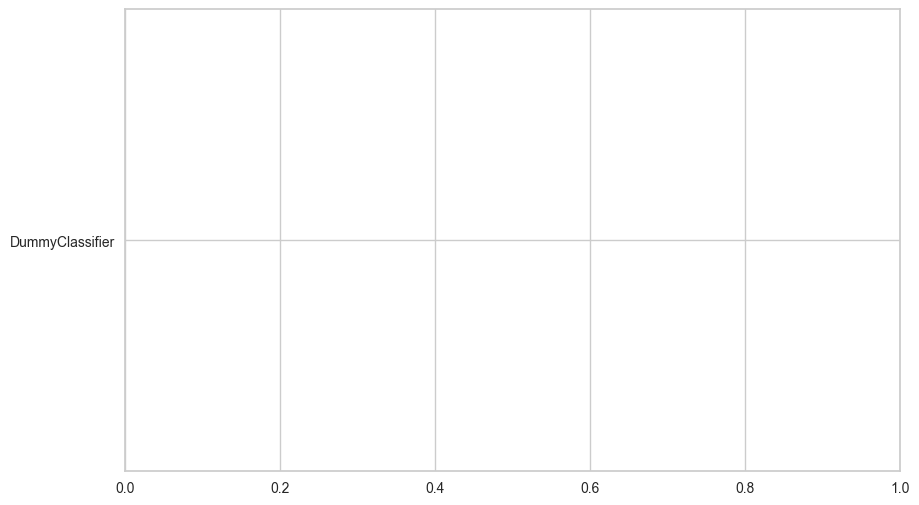

In [69]:
# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh([str(model.__class__.__name__) for model in models], mean_scores, color='skyblue')
plt.xlabel('Mean Accuracy')
plt.title('Mean Accuracy of Different Models')
plt.xlim(0, 1.0)  
plt.gca().invert_yaxis()  
plt.show()

# Creacion de un modelo

*Una buena ventaja de los modelos basados ​​en árboles es que puedes inspeccionar la importancia de la característica. La importancia de la característica le indica cómo Cuánto contribuye una característica al modelo. Tenga en cuenta que eliminar el
característica no significa que la puntuación disminuirá en consecuencia, ya que otras características pueden ser colineales (en este caso podríamos eliminar ya sea la columna sex_male o sex_female ya que tienen un perfecto correlación negativa*

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Crear una instancia del clasificador sin el parámetro obsoleto
rf = RandomForestClassifier(
    random_state=42,
    bootstrap=True,
    class_weight=None,
    criterion='gini',
    max_depth=None,
    max_features='sqrt',  # Reemplazar 'auto' por 'sqrt'
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=10,
    n_jobs=1,
    oob_score=False,
    verbose=0,
    warm_start=False
)

# Ajustar el modelo a los datos de entrenamiento
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, n_jobs=1, random_state=42)

# Evaluacion del modelo 


*Ahora que tenemos un modelo, podemos usar los datos de prueba para ver qué tan bien se generaliza el modelo a datos que no ha visto antes. El método .score de un clasificador devuelve el promedio de la precisión de la predicción. Queremos asegurarnos de llamar al método .score con los datos de prueba (presumiblemente debería funcionar mejor con los datos de entrenamiento).*

In [71]:
rf.score(X_test, y_test)

0.7659033078880407

*también podemos observar otras métricas, como la precisión:*

In [72]:
metrics.precision_score(y_test, rf.predict(X_test))

0.7730496453900709

# Importancia de las características

*La importancia de la característica se calcula observando el error aumentar. Si eliminar una característica aumenta el error en el modelo,la característica es más importante.Realmente me gusta la biblioteca SHAP para explorar las características de un
el modelo considera importante y para explicar las predicciones. Este La biblioteca funciona con modelos de caja negra y lo mostraremos más adelante.*

*Una buena ventaja de los modelos basados ​​en árboles es que puedes inspeccionar la importancia de las características. La importancia de la característica le indica cuánto contribuye una característica al modelo. Tenga en cuenta que eliminar una característica no significa que la puntuación disminuirá en consecuencia, ya que otras características pueden ser colineales (en este caso, podríamos eliminar la columna sex_male o sex_female ya que tienen una correlación negativa perfecta).*

In [73]:
# Iterar sobre las características y sus importancias, ordenadas por importancia en orden descendente
for col, val in sorted(zip(X_train.columns, rf.feature_importances_), key=lambda x: x[1], reverse=True)[:5]:
    # Imprimir el nombre de la característica y su importancia, con formato amigable
    print(f"{col: <15}Importancia: {val:.3f}")

age            Importancia: 0.280
fare           Importancia: 0.274
sex_male       Importancia: 0.230
pclass         Importancia: 0.086
sibsp          Importancia: 0.053


*La importancia de la característica se calcula observando el **aumento del error**. Si eliminar una característica aumenta el error en el modelo, la característica es más importante. Me gusta mucho la biblioteca SHAP para explorar qué características un modelo considera importantes y para explicar las predicciones. Esta biblioteca funciona con modelos de caja negra y la mostraremos más adelante.*

# Optimizando el Modelo 

*Los modelos tienen hiperparámetros que controlan cómo se comportan. Por Al variar los valores de estos parámetros, cambiamos su rendimiento.**Sklearn** tiene una clase de búsqueda de cuadrícula para evaluar un modelo
con diferentes combinaciones de parámetros y devolver el mejor resultado. Podemos usar esos parámetros para crear una instancia de la clase del modelo.*

In [ ]:
# Importar las bibliotecas necesarias
from sklearn import ensemble, model_selection

# Crear un clasificador RandomForest
rf4 = ensemble.RandomForestClassifier()

# Definir el diccionario de parámetros para la búsqueda en cuadrícula
params = {
    "max_features": [2, "auto"],
    "n_estimators": [15, 200],
    "min_samples_leaf": [1, 0.1],
    "random_state": [42],
}

# Realizar la búsqueda en cuadrícula con validación cruzada
cv = model_selection.GridSearchCV(rf4, params, n_jobs=-1).fit(X_train, y_train)
print(cv)
# Imprimir los mejores parámetros encontrados por la búsqueda en cuadrícula
print(cv.best_params_)


# Crear un nuevo clasificador RandomForest con los mejores parámetros encontrados
rf5 = ensemble.RandomForestClassifier(
    {
        "max_features": None,  # Cambiado de 'auto' a None
        "min_samples_leaf": 1,
        "n_estimators": 200,
        "random_state": 42,
    }
)

# Ajustar el modelo al conjunto de entrenamiento
rf5.fit(X_train, y_train)
# 
rf5.score(X_test, y_test)



c:\Users\felip\OneDrive\Documentos\Python\Codigos\Ciencia_Datos\datos\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\felip\OneDrive\Documentos\Python\Codigos\Ciencia_Datos\datos\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\felip\OneDrive\Documentos\Python\Codigos\Ciencia_Datos\datos\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\felip\OneDrive\Documentos\Python\C

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [2, 'auto'],
                         'min_samples_leaf': [1, 0.1],
                         'n_estimators': [15, 200], 'random_state': [42]})
{'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 200, 'random_state': 42}


0.7531806615776081

# Matriz de confusion 

*Una matriz de confusión nos permite ver las clasificaciones correctas así como falsos positivos y falsos negativos. Puede ser que nosotros desea optimizar hacia falsos positivos o falsos negativos, y diferentes modelos o parámetros pueden alterar eso. Nosotros podemos usar "sklearn" para obtener una versión de texto, o Yellowbrick.*

c:\Users\felip\OneDrive\Documentos\Python\Codigos\Ciencia_Datos\datos\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


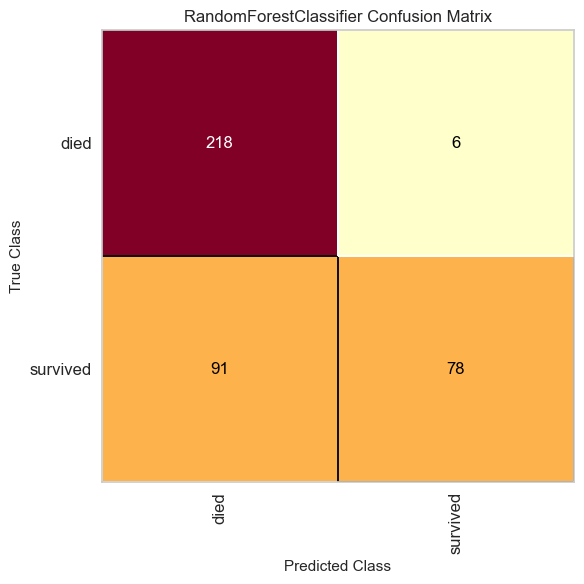

In [ ]:
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

# Calcula la matriz de confusión
y_pred = rf5.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Define el mapeo de etiquetas
mapping = {0: "died", 1: "survived"}

# Configura la visualización de la matriz de confusión
fig, ax = plt.subplots(figsize=(6, 6))
cm_viz = ConfusionMatrix(
    rf5,
    classes=["died", "survived"],
    label_encoder=mapping,
)

# Calcula la puntuación y muestra la visualización
cm_viz.score(X_test, y_test)
cm_viz.poof()

# Guarda la figura en una imagen
# Guarda la figura en una imagen en el directorio "images"
fig.savefig("images/mlpr_0304.png", dpi=300, bbox_inches="tight")


# ROC CURVE

*Un gráfico de característica operativa del receptor (ROC) es un método común Herramienta utilizada para evaluar clasificadores. Midiendo el área bajo la curva (AUC), podemos obtener una métrica para comparar diferentes clasificadores
(ver Figura 3-5). Traza la tasa positiva verdadera contra la tasa de falsos positivos. Podemos usar sklearn para calcular el AUC.*

In [ ]:
from sklearn.metrics import roc_auc_score

y_pred = rf5.predict(X_test)
roc_auc_score(y_test, y_pred)

0.7173763736263736

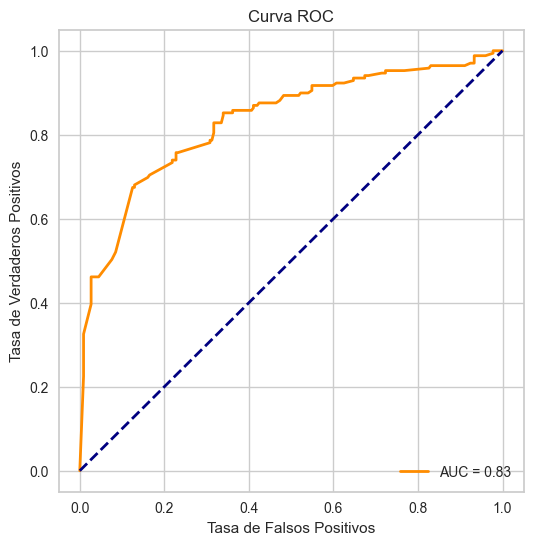

In [ ]:
from sklearn.metrics import roc_curve, auc

# Obtener las puntuaciones de la clase positiva
y_scores = rf5.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
import os

# Ruta del directorio de imágenes
image_dir = "images"

# Crea el directorio si no existe
os.makedirs(image_dir, exist_ok=True)

# Configurar la visualización de la curva ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

# Guardar la figura en el directorio 'images'
plt.savefig(os.path.join(image_dir, "mlpr_0305_alternative.png"))
plt.show()


# Curva de aprendizaje

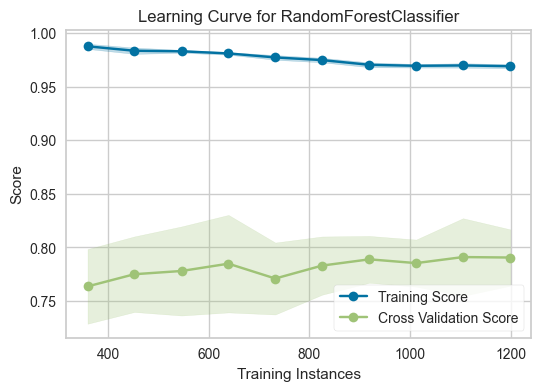

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import LearningCurve

rf5 = RandomForestClassifier()

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(6, 4))

# Configurar validación cruzada
cv = StratifiedKFold(n_splits=12)

# Crear tamaños de entrenamiento
sizes = np.linspace(0.3, 1.0, 10)

# Inicializar visualizador de curva de aprendizaje
lc_viz = LearningCurve(
    rf5,
    cv=cv,
    train_sizes=sizes,
    scoring="f1_weighted",
    n_jobs=4,
    ax=ax,
)

# Ajustar el visualizador a los datos
lc_viz.fit(X, y)

# Hacer visible el gráfico
lc_viz.poof()

# Guardar la figura como imagen
fig.savefig("images/mlpr_0306.png")

# Implementacion del modelo 

In [ ]:
import pickle
from sklearn.metrics import roc_auc_score

# Supongamos que ya tienes el modelo rf5 definido y entrenado

# Guardar el modelo en un archivo usando pickle
with open("rf5_model.pkl", "wb") as model_file:
    pickle.dump(rf5, model_file)

# Cargar el modelo desde el archivo usando pickle
with open("rf5_model.pkl", "rb") as model_file:
    rf6 = pickle.load(model_file)

# Ajustar el modelo cargado con los datos de entrenamiento
rf6.fit(X_train, y_train)

# Ahora puedes usar el modelo cargado para hacer predicciones
y_pred = rf6.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)

print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.7791895604395604
